# Simple Starter Notebook for;
## Cryptocurrency Closing Price Prediction Challenge


Can you predict the closing price for a cryptocurrency? 

The objective of this challenge is to create a machine learning model that will predict closing price for a crypto currency coing. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
# Load files
train = pd.read_csv('../input/cryptocurrency-price-prediction/train.csv')
test = pd.read_csv('../input/cryptocurrency-price-prediction/test.csv')
ss = pd.read_csv('../input/cryptocurrency-price-prediction/sample_submission.csv')

In [3]:
# check data shapes
train.shape, test.shape, ss.shape

((9000, 49), (2518, 48), (2518, 2))

In [4]:
# Preview train
train.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,...,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,...,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,...,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216


In [5]:
test.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_JZZnaV,1,49101.830017,49145.590922,48679.101583,2.586587e+09,9.102587e+11,1547.0,899.0,73.0,...,1.0,515.0,3.0,1.0,1.0,1.0,NaN,10795,3.242141,1.513141e+12
1,ID_JZdah4,1,7084.506369,7114.741926,7084.506369,1.748354e+09,1.304944e+11,1078.0,644.0,37.0,...,1.0,987.0,2.0,1.0,1.0,NaN,4.0,4384,-1.635662,2.058684e+11
2,ID_Jb3VHp,1,7391.081815,7391.081815,7380.118544,7.354032e+08,1.339929e+11,649.0,444.0,16.0,...,1.0,768.0,2.0,1.0,1.0,NaN,NaN,3196,0.990546,1.961920e+11
3,ID_Jc4znH,1,8020.452275,8022.211041,8009.023477,4.651574e+08,1.458924e+11,830.0,571.0,19.0,...,1.0,426.0,2.0,1.0,1.0,NaN,NaN,3422,4.280879,2.139004e+11
4,ID_Jc7U7d,1,10767.128491,10767.128491,10759.926010,6.156260e+08,1.989619e+11,1981.0,952.0,79.0,...,1.0,968.0,2.0,1.0,1.0,1.0,1.0,4499,-1.016267,3.475088e+11


In [6]:
test.dtypes

id                          object
asset_id                     int64
open                       float64
high                       float64
low                        float64
volume                     float64
market_cap                 float64
url_shares                 float64
unique_url_shares          float64
reddit_posts               float64
reddit_posts_score         float64
reddit_comments            float64
reddit_comments_score      float64
tweets                     float64
tweet_spam                 float64
tweet_followers            float64
tweet_quotes               float64
tweet_retweets             float64
tweet_replies              float64
tweet_favorites            float64
tweet_sentiment1           float64
tweet_sentiment2           float64
tweet_sentiment3           float64
tweet_sentiment4           float64
tweet_sentiment5           float64
tweet_sentiment_impact1    float64
tweet_sentiment_impact2    float64
tweet_sentiment_impact3    float64
tweet_sentiment_impa

In [7]:
ss.head()

,id,close
0,ID_JZZnaV,0
1,ID_JZdah4,0
2,ID_Jb3VHp,0
3,ID_Jc4znH,0
4,ID_Jc7U7d,0


# Let's look for missing values

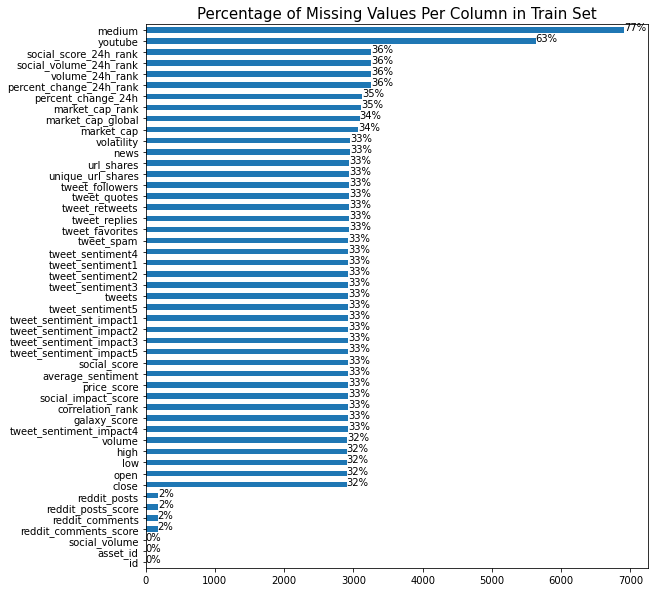

In [8]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

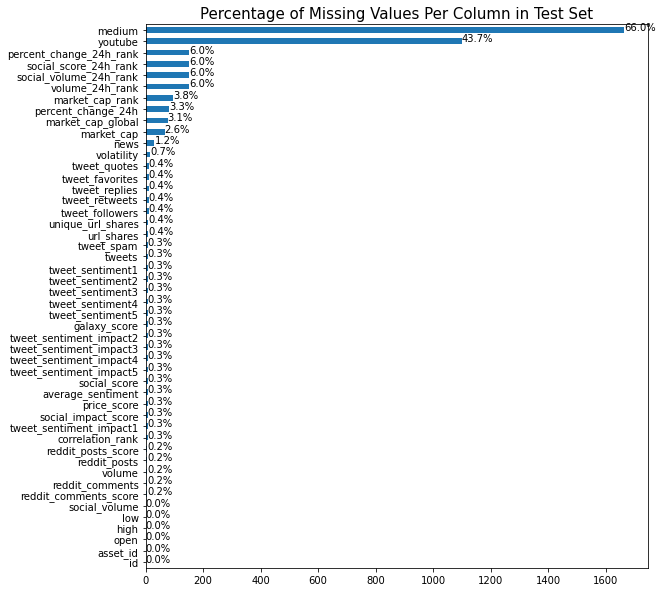

In [9]:
# Check if there missing values in test set
ax = test.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Test Set', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.1f}%'.format((p.get_width()/test.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [10]:
# fill missing values
train = train.fillna(0)
test = test.fillna(0)

In [11]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

In [12]:
# Select main columns to be used in training
main_cols = train.columns.difference(['id', 'close'])
X = train[main_cols]
y = train.close.astype(float)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [13]:
# Instantiate model
lm2 = LinearRegression()
# Fit Model
lm2.fit(X_train, y_train)
# Predict
y_pred = lm2.predict(X_test)

In [14]:
# Make predictions in test set and prepare submission file
predictions = lm2.predict(test[main_cols])
sub_file = ss.copy()
sub_file.close = predictions
sub_file.to_csv('Baseline.csv', index = False)

In [15]:
sub_file.head()

,id,close
0,ID_JZZnaV,48803.265787
1,ID_JZdah4,7111.230816
2,ID_Jb3VHp,7376.639850
3,ID_Jc4znH,8008.376656
4,ID_Jc7U7d,10770.866794


In [16]:
# files.download('Baseline.csv') 